<a href="https://colab.research.google.com/github/KareemEzzaldin/CodAlpha_DS_Unemployment_Analysis/blob/main/CodAlpha_DS_Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

df = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [ ]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

/tmp/ipython-input-2009923706.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855


In [ ]:
# National mean unemployment per month
monthly = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

In [ ]:
# Pre-Covid vs Covid period
covid_start = pd.to_datetime("2020-03-01")
pre_covid = monthly[monthly['Date'] < covid_start]
covid = monthly[monthly['Date'] >= covid_start]

In [ ]:
summary = {
    "rows": len(monthly),
    "date_range_start": monthly['Date'].min(),
    "date_range_end": monthly['Date'].max(),
    "pre_covid_mean": pre_covid['Estimated Unemployment Rate (%)'].mean(),
    "covid_period_mean": covid['Estimated Unemployment Rate (%)'].mean(),
    "max_rate": monthly['Estimated Unemployment Rate (%)'].max(),
    "max_rate_date": monthly.loc[monthly['Estimated Unemployment Rate (%)'].idxmax(), 'Date'],
    "min_rate": monthly['Estimated Unemployment Rate (%)'].min(),
    "min_rate_date": monthly.loc[monthly['Estimated Unemployment Rate (%)'].idxmin(), 'Date'],
}

print("Summary:", summary)

Summary: {'rows': 10, 'date_range_start': Timestamp('2020-01-31 00:00:00'), 'date_range_end': Timestamp('2020-10-31 00:00:00'), 'pre_covid_mean': np.float64(9.231346153846154), 'covid_period_mean': np.float64(13.00678774928775), 'max_rate': 23.244444444444444, 'max_rate_date': Timestamp('2020-05-31 00:00:00'), 'min_rate': 8.026296296296296, 'min_rate_date': Timestamp('2020-10-31 00:00:00')}


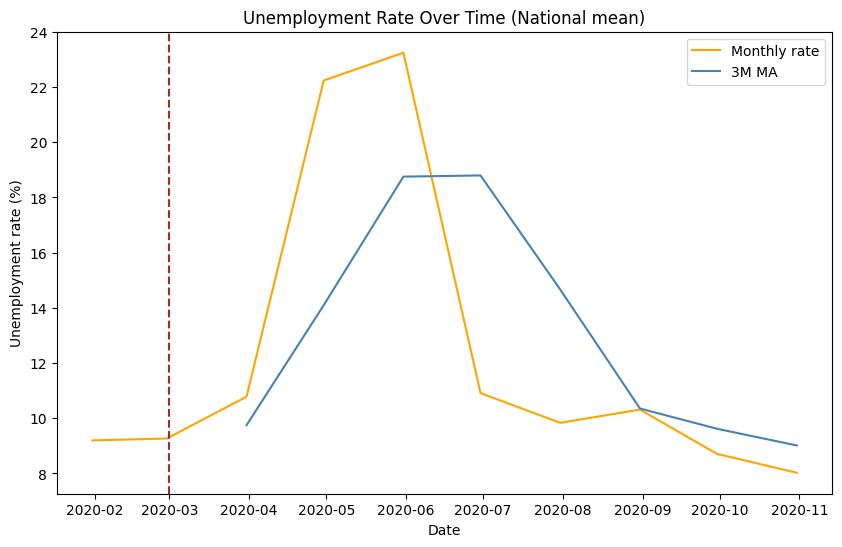

In [ ]:
# Unemployment Rate Over Time
plt.figure(figsize=(10,6))
plt.plot(monthly['Date'], monthly['Estimated Unemployment Rate (%)'], label='Monthly rate', color='orange')
plt.plot(monthly['Date'], monthly['Estimated Unemployment Rate (%)'].rolling(3).mean(), label='3M MA', color='steelblue')
plt.axvline(covid_start, linestyle="--", color="brown")
plt.title("Unemployment Rate Over Time (National mean)")
plt.xlabel("Date")
plt.ylabel("Unemployment rate (%)")
plt.legend()
plt.show()

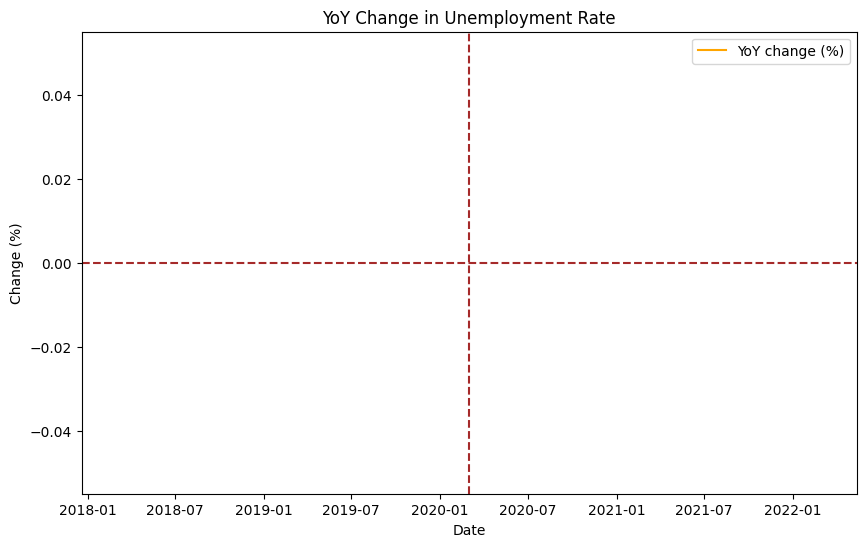

In [ ]:
# Year-over-Year Change
monthly['YoY_change'] = monthly['Estimated Unemployment Rate (%)'].pct_change(12) * 100
plt.figure(figsize=(10,6))
plt.plot(monthly['Date'], monthly['YoY_change'], color="orange", label="YoY change (%)")
plt.axhline(0, linestyle="--", color="brown")
plt.axvline(covid_start, linestyle="--", color="brown")
plt.title("YoY Change in Unemployment Rate")
plt.xlabel("Date")
plt.ylabel("Change (%)")
plt.legend()
plt.show()

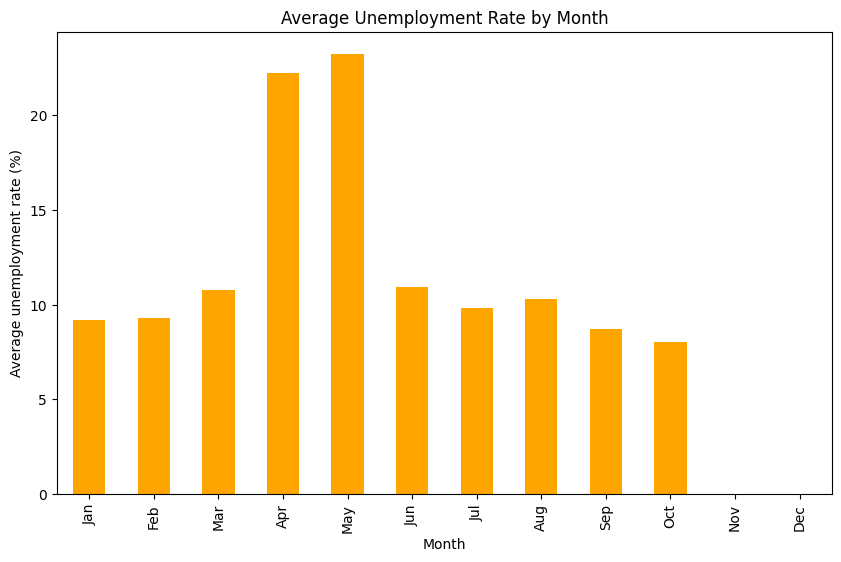

In [ ]:
# Seasonal Monthly Averages
monthly['Month'] = monthly['Date'].dt.month_name().str[:3]
seasonal = monthly.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
seasonal = seasonal.reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.figure(figsize=(10,6))
seasonal.plot(kind='bar', color="orange")
plt.title("Average Unemployment Rate by Month")
plt.ylabel("Average unemployment rate (%)")
plt.show()

In [ ]:
print(f"Unemployment rose from {summary['pre_covid_mean']:.2f}% before Covid "
      f"to {summary['covid_period_mean']:.2f}% during Covid.")
print(f"Highest rate {summary['max_rate']:.2f}% on {summary['max_rate_date'].date()}, "
      f"lowest {summary['min_rate']:.2f}% on {summary['min_rate_date'].date()}.")


Unemployment rose from 9.23% before Covid to 13.01% during Covid.
Highest rate 23.24% on 2020-05-31, lowest 8.03% on 2020-10-31.
